<a href="https://colab.research.google.com/github/ntlg72/Proyecto-AED/blob/main/ProyetoAED_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Realizado por: Michel Burgos Santos, Juan David Daza, Esmeralda Erazo Varela y Natalia López Gallego.

#**Limpieza**

La documentación de los pasos que se llevaron a cabo para limpiar cada dataset se encuentran en el cuaderno para la limpieza del estado de Virginia.

https://colab.research.google.com/drive/1UEPHu2uUsqDXyixNkyMdhdimRT6B3aHZ?usp=sharing

Se puede acceder a la limpieza de los demás datasets por medio de los siguientes enlaces:


*   New York:https://colab.research.google.com/drive/1eUKwdgSgMrPn48kAoHUx9lr_qNp-zFKW?usp=sharing
*   Texas:https://colab.research.google.com/drive/1v-eGGuQSGFEygt7_PRqLsedG58nmjE6D?usp=sharing
*   Washington:https://colab.research.google.com/drive/1rTRvS2tLvsPqqLIa2mFxDvw1956n6xvE?usp=sharing


En la siguiente sección se puede encontrar los enlaces de los datasets limpios alojados en Github.







# **Unificación de los 4 datasets limpios**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url_newyork= "https://raw.githubusercontent.com/ntlg72/Proyecto-AED/main/newyork_limpio.csv"
url_texas="https://raw.githubusercontent.com/ntlg72/Proyecto-AED/main/Texas_limpio.csv"
url_virginia="https://raw.githubusercontent.com/ntlg72/Proyecto-AED/main/virginia_limpio.csv"
url_washington="https://raw.githubusercontent.com/ntlg72/Proyecto-AED/main/Washington_limpio.csv"

In [ ]:
newyork=pd.read_csv(url_newyork)
texas=pd.read_csv(url_texas)
virginia=pd.read_csv(url_virginia)
washington=pd.read_csv(url_washington)

In [ ]:
convert_dict = {
    'Region': str,
    'Gender': str,
    'Handed': str,
    'Favourite_physical_activity': str,
    'Importance_reducing_pollution': float,
    'Birth_month': str,
    'Beverage': str,
    'Favorite_School_Subject': str,
    'Sleep_Hours_Non_Schoolnight': float,
    'Paid_Work_Hours': float,
    'Work_At_Home_Hours': float,
    'Planned_Education_Level': str
}

In [ ]:
newyork = newyork.astype(convert_dict)
texas = texas.astype(convert_dict)
washington = washington.astype(convert_dict)
virginia = virginia.astype(convert_dict)

In [ ]:
df = pd.concat([newyork, texas, virginia, washington], axis=0)

In [ ]:
print(df.info())
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to 292
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         1335 non-null   object 
 1   Gender                         1335 non-null   object 
 2   Handed                         1335 non-null   object 
 3   Favourite_physical_activity    1335 non-null   object 
 4   Importance_reducing_pollution  1335 non-null   float64
 5   Birth_month                    1335 non-null   object 
 6   Beverage                       1335 non-null   object 
 7   Favorite_School_Subject        1335 non-null   object 
 8   Sleep_Hours_Non_Schoolnight    1335 non-null   float64
 9   Paid_Work_Hours                1335 non-null   float64
 10  Work_At_Home_Hours             1335 non-null   float64
 11  Planned_Education_Level        1335 non-null   object 
dtypes: float64(4), object(8)
memory usage: 135.6+ KB
None


,0
Region,0
Gender,0
Handed,0
Favourite_physical_activity,0
Importance_reducing_pollution,0
Birth_month,0
Beverage,0
Favorite_School_Subject,0
Sleep_Hours_Non_Schoolnight,0
Paid_Work_Hours,0


In [ ]:
df.select_dtypes(include=['object']).columns

Index(['Region', 'Gender', 'Handed', 'Favourite_physical_activity',
       'Birth_month', 'Beverage', 'Favorite_School_Subject',
       'Planned_Education_Level'],
      dtype='object')

# **Preguntas con respecto variables categóricas (moda)**

## 1. ¿Cuántos estudiantes son diestros, zurdos o ambidiestros?

In [ ]:
dominant_hand = df['Handed'].value_counts()
print(dominant_hand)

Handed
Right-Handed    1151
Left-Handed      120
Ambidextrous      64
Name: count, dtype: int64


Código en R para la realización de gráficas de barras.

```
# ggplot(data=subset(df, !is.na(Handed)), aes(x = Handed))+
  geom_bar(aes(fill = Handed))+
  geom_text(aes(label = ..count..), stat = "count", vjust = 1, colour = "white")+
  labs(title = "Number of Right-Handed, Left-Handed and Ambidextrous Students")
```

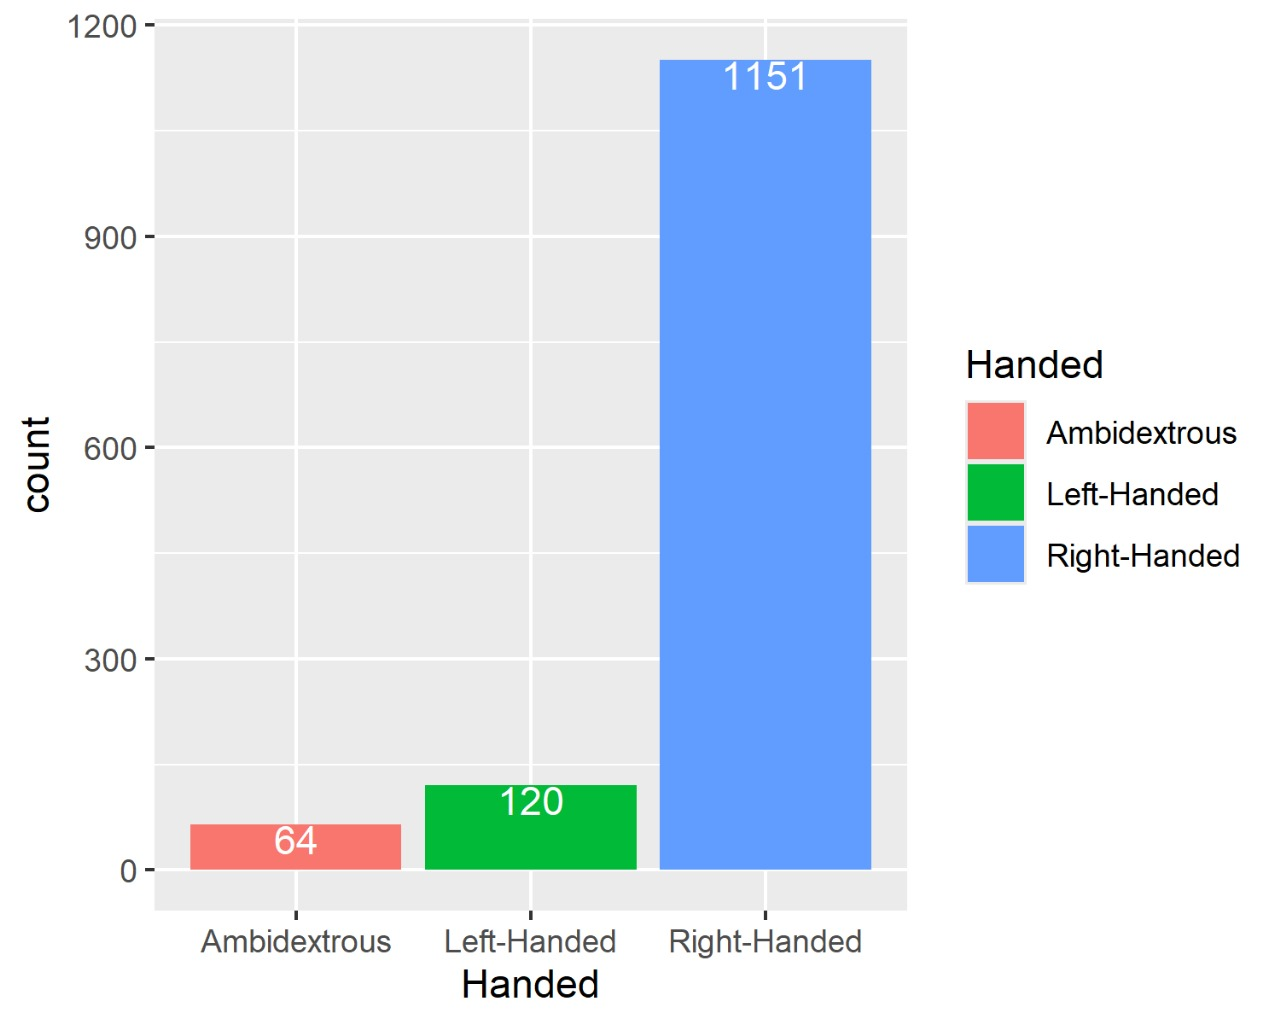

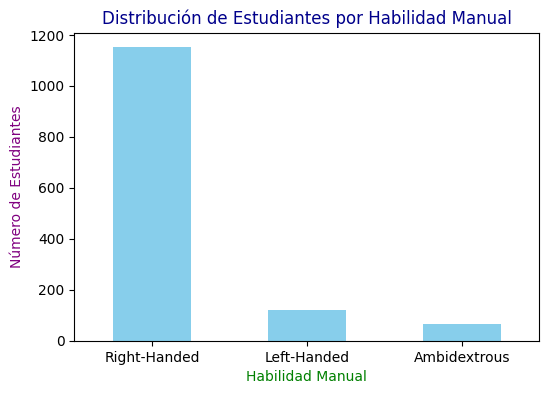

In [ ]:
# Contar estudiantes diestros, zurdos o ambidiestros
handedness_count = df['Handed'].value_counts()

# Gráfica
plt.figure(figsize=(6, 4))
handedness_count.plot(kind='bar', color='skyblue')
plt.title('Distribución de Estudiantes por Habilidad Manual', color='darkblue')  # Título en azul oscuro
plt.xlabel('Habilidad Manual', color='green')  # Etiqueta del eje X en verde
plt.ylabel('Número de Estudiantes', color='purple')
plt.xticks(rotation=0)
plt.show()

## 2. ¿Cuál es el mes donde nacieron más estudiantes de los que participan en el Censo escolar en cada estado?

In [ ]:
birth_month_by_state = df.groupby('Region')['Birth_month'].agg(pd.Series.mode)
print(birth_month_by_state)

Region
NY     November
TX    September
VA        April
WA         June
Name: Birth_month, dtype: object


Código en R para la realización de gráficas de barras.

```
# ggplot(data=subset(df, !is.na(Birth_month)), aes(x = Birth_month ))+
  geom_bar(aes(fill = Birth_month)) +
  geom_text(aes(label = ..count..), stat = "count", vjust = 1, colour = "white", size = 3)+
  facet_wrap(~Region) +
  theme_bw() +
  labs(title = "Month with the Highest Number of Births by State")+
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))
```

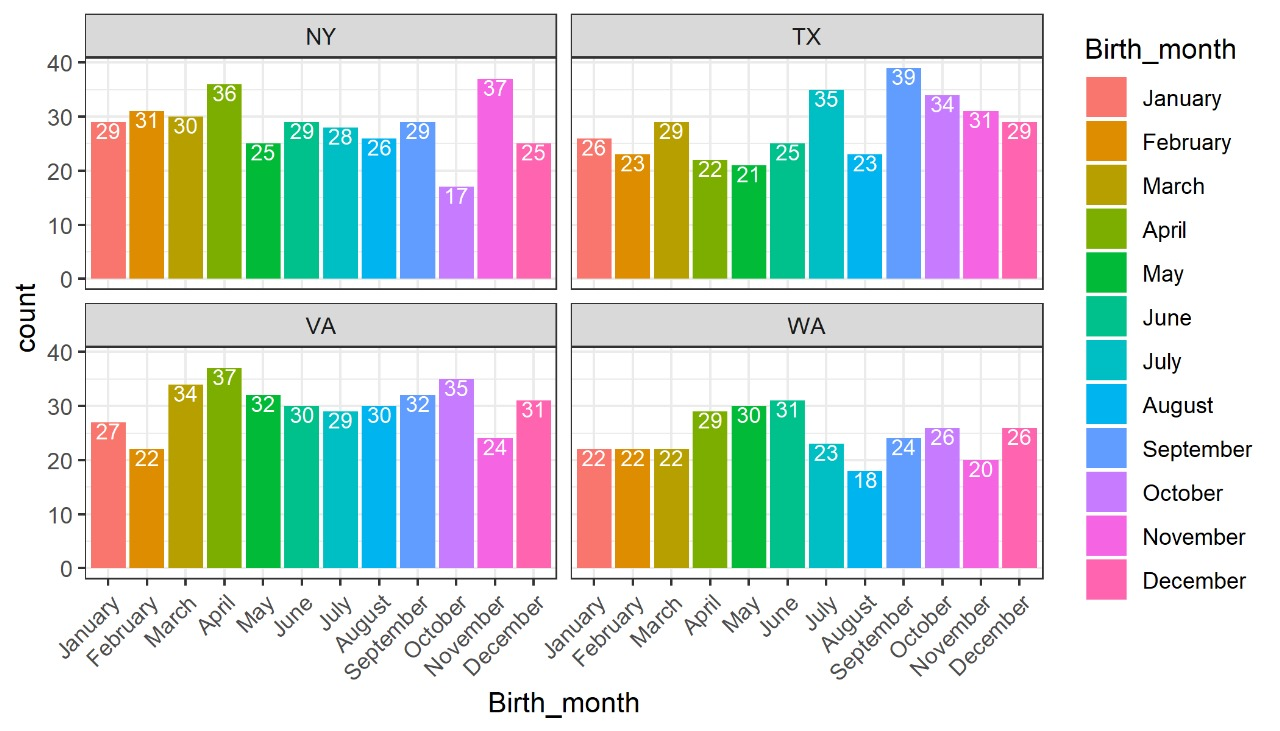

## 3. ¿Cuál es la bebida favorita de los estudiantes que participan en el Censo escolar en cada estado?


In [ ]:
beverage_by_state = df.groupby('Region')['Beverage'].agg(pd.Series.mode)
print(beverage_by_state)

Region
NY    Water
TX    Water
VA    Water
WA    Water
Name: Beverage, dtype: object


Código en R para la realización de gráficas de barras.

```
ggplot(data=subset(df, !is.na(Beverage)), aes(x = Beverage))+
  geom_bar(aes(fill = Beverage)) +
  geom_text(aes(label = ..count..), stat = "count", vjust = 0, colour = "black", size = 3)+
  facet_wrap(~Region) +
  theme_bw() +
  labs(title = "Favorite Beverage of Students by State") +
  theme(axis.text.x=element_blank())

```

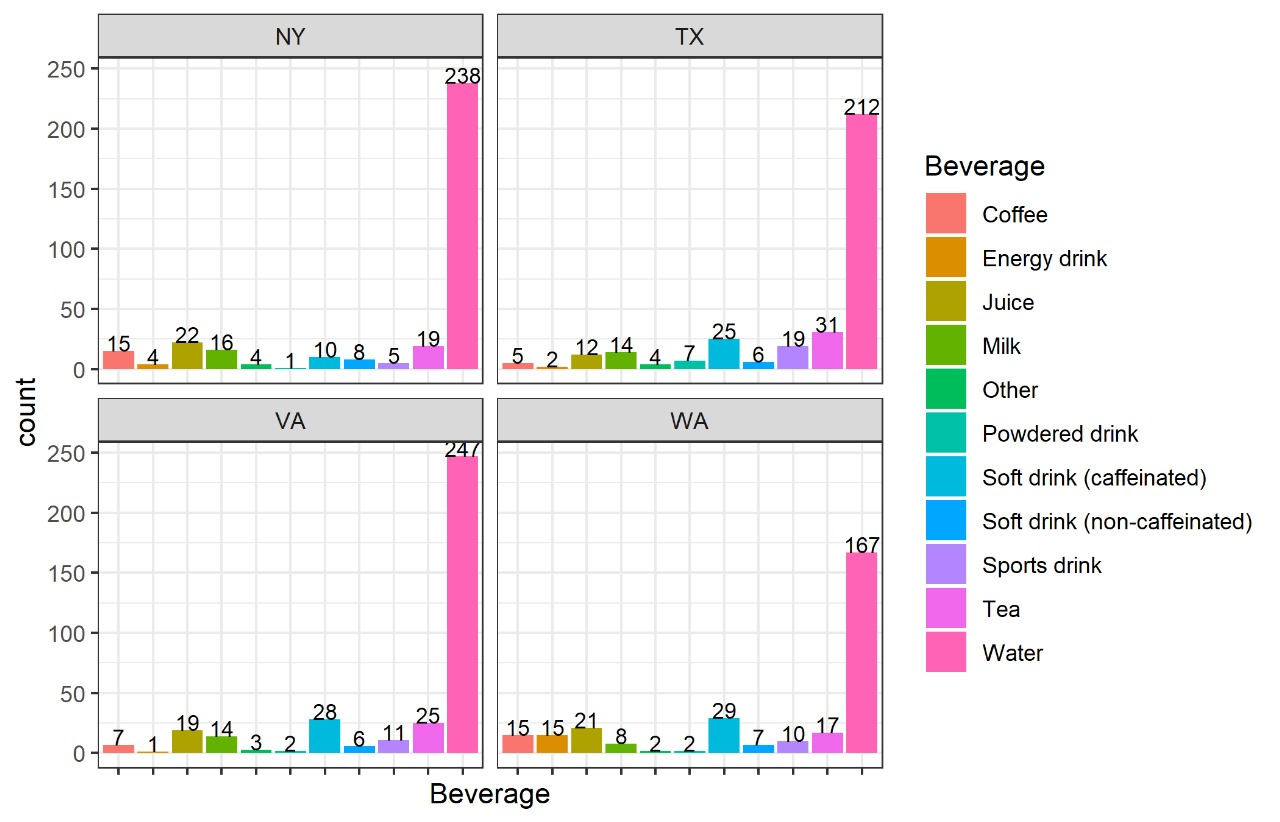

## 4. ¿Cuál es el deporte / actividad favorita de los estudiantes que participan en el Censo escolar en cada estado?

In [ ]:
sport_by_state = df.groupby('Region')['Favourite_physical_activity'].agg(pd.Series.mode)
print(sport_by_state)

Region
NY    Other activities/sports
TX    Other activities/sports
VA    Other activities/sports
WA    Other activities/sports
Name: Favourite_physical_activity, dtype: object


Código en R

```
# ggplot(data=subset(df, !is.na(Favourite_physical_activity)), aes(x = Favourite_physical_activity))+
  geom_bar(aes(fill = Favourite_physical_activity)) +
  geom_text(aes(label = ..count..), stat = "count", vjust = 0, colour = "black", size = 3)+
  facet_wrap(~Region) +
  theme_bw() +
  labs(title = "Favorite Sport/Activity of Students by State") +
  theme(axis.text.x=element_blank())
```

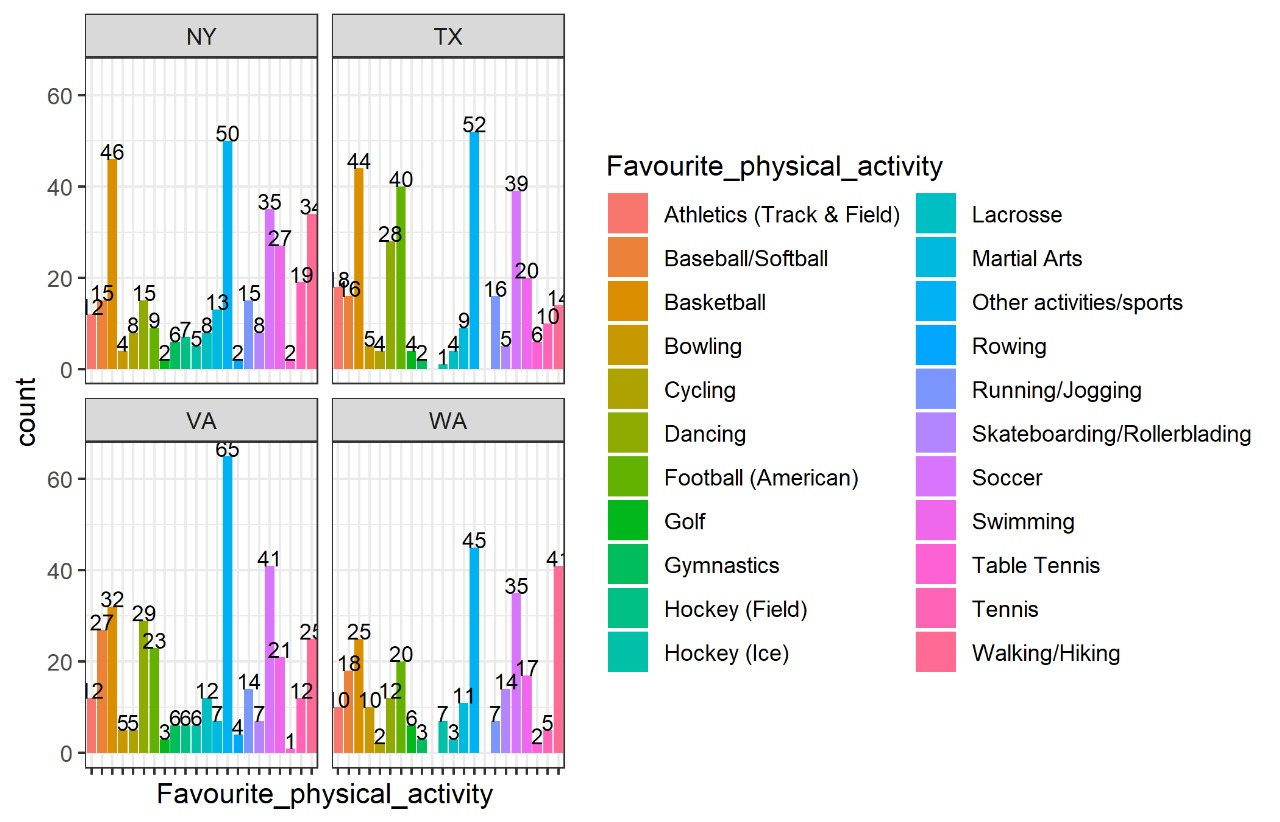

## 5. ¿Cuál es el nivel más alto de educación que planean alcanzar los estudiantes que participan en el Censo escolar en cada estado?

In [ ]:
education_by_state = df.groupby('Region')['Planned_Education_Level'].agg(pd.Series.mode)
print(education_by_state)

Region
NY    Graduate degree
TX    Graduate degree
VA    Graduate degree
WA    Graduate degree
Name: Planned_Education_Level, dtype: object


Código en R

```
# ggplot(data=subset(df, !is.na(Planned_Education_Level)), aes(x = Planned_Education_Level))+
  geom_bar(aes(fill = Planned_Education_Level)) +
  geom_text(aes(label = ..count..), stat = "count", vjust = 0.1, colour = "black", size = 3)+
  facet_wrap(~Region) +
  theme_bw() +
  labs(title = "Planned Highest Education Level of Students by State ") +
  theme(axis.text.x=element_blank())
```

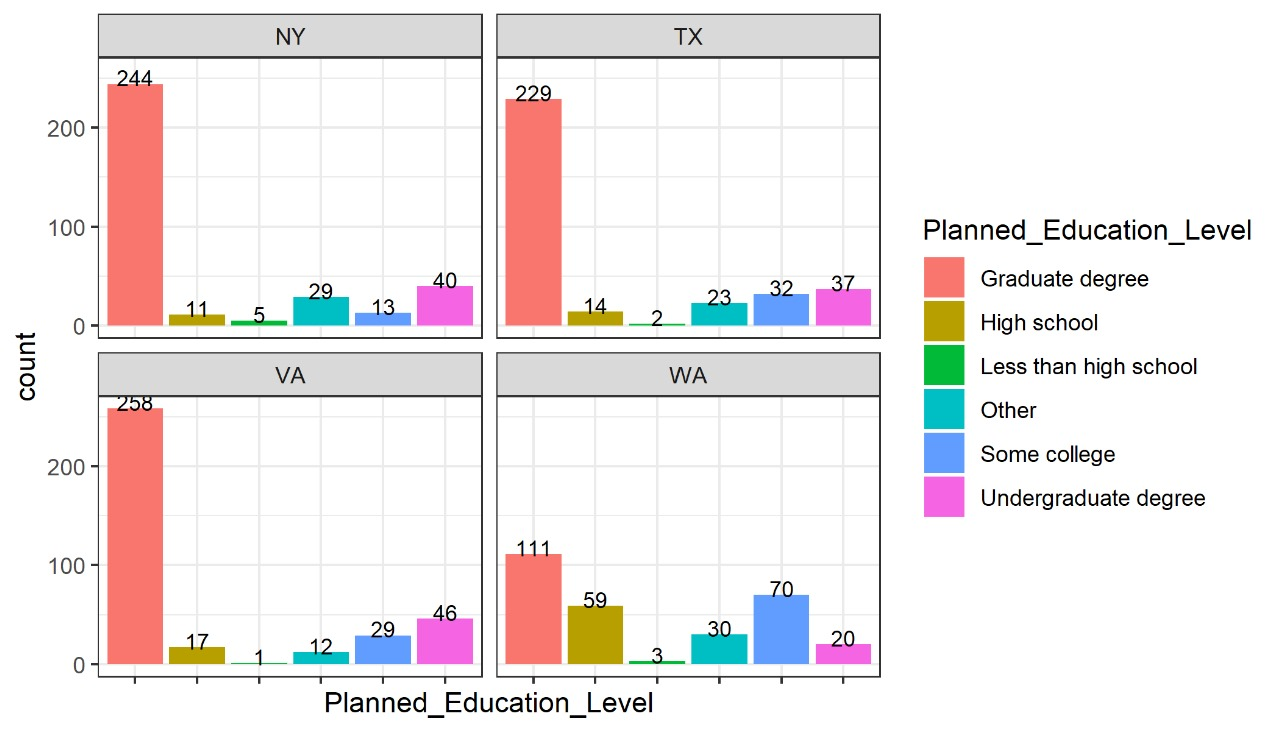

# **Preguntas con respecto a variables numéricas (gráficas)**

## 6. Construya un histograma con la variable “tiempo que trabaja con pago el estudiante en la semana (medido en horas)” y a partir de esta gráfica responda las siguientes preguntas:

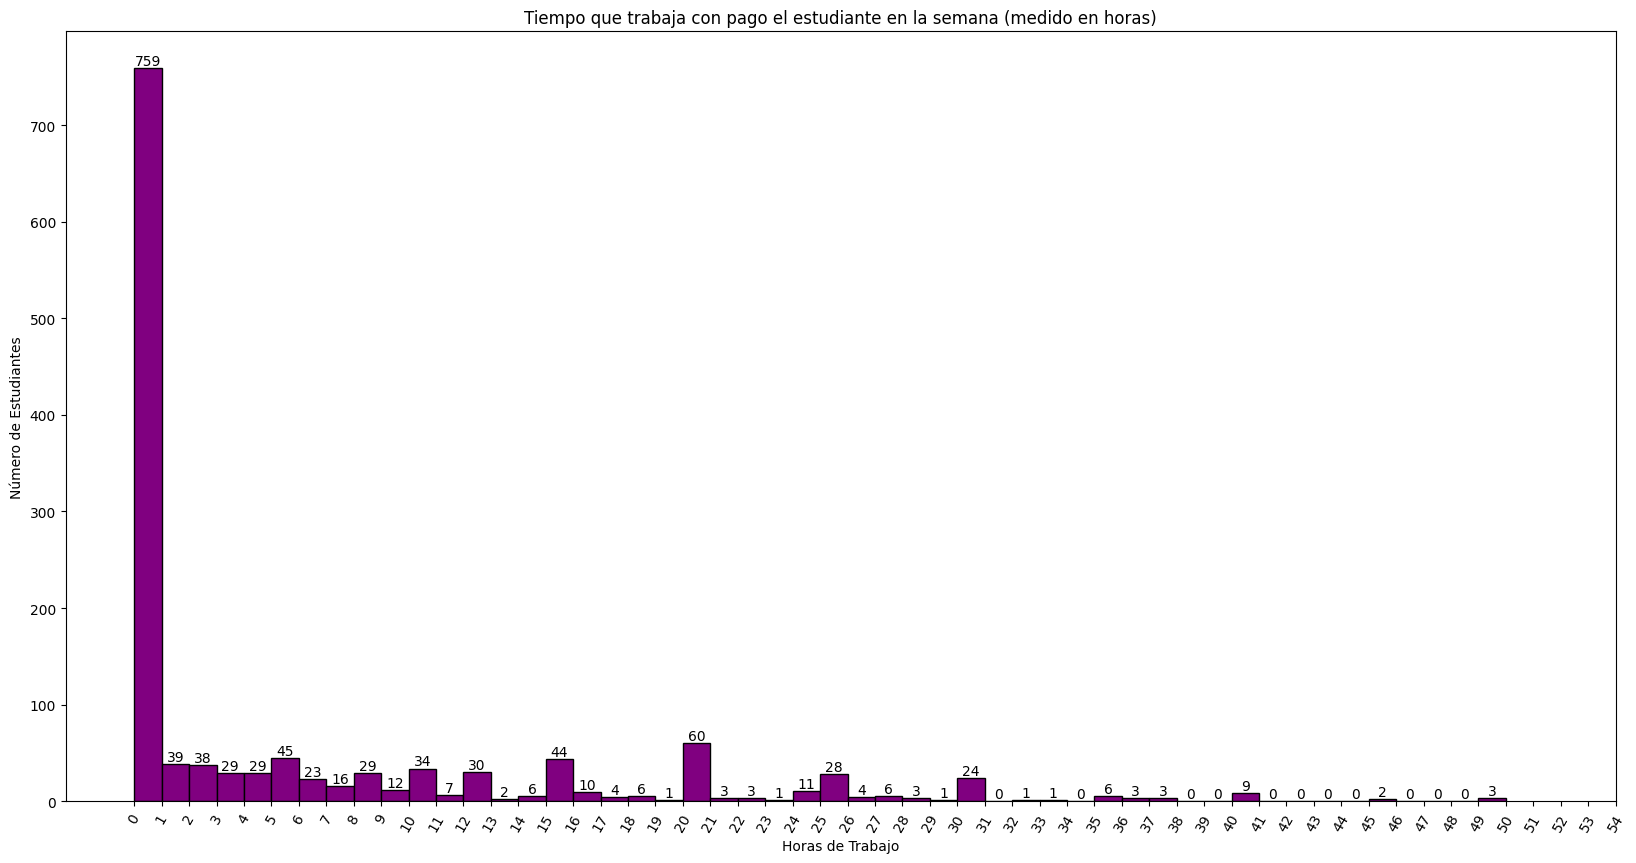

In [ ]:

# Aumentar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Crear el histograma
ax = df['Paid_Work_Hours'].plot(kind='hist', bins=50, color='purple', edgecolor='black')

# Etiquetas y título
plt.title('Tiempo que trabaja con pago el estudiante en la semana (medido en horas)')
plt.xlabel('Horas de Trabajo')
plt.ylabel('Número de Estudiantes')

# Obtener los valores del histograma para agregar los números a cada bin
counts, bins = np.histogram(df['Paid_Work_Hours'], bins=50)

# Agregar los números sobre cada barra
for i in range(50):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], str(counts[i]), ha='center', va='bottom')
plt.xticks(range(0, 55, 1), rotation=60)
# Mostrar gráfico
plt.show()


a) ¿Qué porcentaje de los estudiantes de la muestra trabajan máximo 13 horas a la semana con pago?

R/ Aproximadamente el 81.8% (1092/1335) de los estudiantes de la muestra trabajan máximo 13 horas a la semana con pago.

In [ ]:
data = df['Paid_Work_Hours']

# Calcular el número de estudiantes que trabajan 13 horas o menos
num_students_13_hours_or_less = np.sum(data <= 13)

# Calcular el tamaño total de la muestra
total_students = len(data)

# Calcular el porcentaje
percentage = (num_students_13_hours_or_less / total_students) * 100

# Imprimir el resultado
print(f"El {percentage:.2f}% de los estudiantes trabajan 13 horas o menos a la semana.")

El 81.80% de los estudiantes trabajan 13 horas o menos a la semana.


b) ¿Qué porcentaje de los estudiantes de la muestra trabajan mínimo 3 horas a la semana con pago?

R/ Aproximadamente el 37.4% (499/1335) de los estudiantes de la muestra trabajan minimo 3 horas a la semana con pago.

In [ ]:
data = df['Paid_Work_Hours']

# Calcular el número de estudiantes que trabajan 13 horas o menos
num_students_13_hours_or_less = np.sum(data >= 3)

# Calcular el tamaño total de la muestra
total_students = len(data)

# Calcular el porcentaje
percentage = (num_students_13_hours_or_less / total_students) * 100

# Imprimir el resultado
print(f"El {percentage:.2f}% de los estudiantes trabajan minimo 3 horas horas a la semana con pago.")

El 37.38% de los estudiantes trabajan minimo 3 horas horas a la semana con pago.


c) ¿El 20 % de los estudiantes trabajan mínimo cuántas horas con pago?

In [ ]:
# Cálculo del percentil 20 para obtener cuántas horas trabaja el 20% de los estudiantes con pago (mínimo)
percentile_20_min = df['Paid_Work_Hours'].quantile(0.20)
print(f'El 20% de los estudiantes trabajan al menos {percentile_20_min:.2f} horas a la semana.')

El 20% de los estudiantes trabajan al menos 0.00 horas a la semana.


d) ¿El 20 % de los estudiantes trabajan máximo cuantas horas con pago?

In [ ]:
# Cálculo del percentil 80 para obtener cuántas horas trabaja edferior de los estudiantes con pago (máximo)
percentile_80_max = df['Paid_Work_Hours'].quantile(0.80)
print(f'El 20% superior de los estudiantes trabajan como máximo {percentile_80_max:.2f} horas a la semana.')

El 20% superior de los estudiantes trabajan como máximo 12.00 horas a la semana.


e) ¿En cuál intervalo se halla la moda?

R/ La moda se halla en el intervalo [0-1].

In [ ]:
# Cálculo de la moda
mode_paid_hours = df['Paid_Work_Hours'].mode()[0]
print(f'La moda de las horas de trabajo pagado es: {mode_paid_hours} horas.')

La moda de las horas de trabajo pagado es: 0.0 horas.


f ) ¿El 50 % de los estudiantes trabajan máximo cuantas horas con pago?

R/ El 50 % de los estudiantes trabajan máximo 0 horas con pago.

In [ ]:
# Cálculo del percentil 50 (mediana)
median_paid_hours = df['Paid_Work_Hours'].median()
print(f'El 50% de los estudiantes trabajan máximo {median_paid_hours} horas a la semana.')

El 50% de los estudiantes trabajan máximo 0.0 horas a la semana.


g) ¿En promedio cuantas horas trabajan con pago a la semana los estudiantes? ¿La desviación estándar?

In [ ]:
# Cálculo del promedio y desviación estándar
mean_paid_hours = df['Paid_Work_Hours'].mean()
std_paid_hours = df['Paid_Work_Hours'].std()

print(f'En promedio, los estudiantes trabajan {mean_paid_hours:.2f} horas a la semana.')
print(f'La desviación estándar de las horas trabajadas es {std_paid_hours:.2f}.')

En promedio, los estudiantes trabajan 5.65 horas a la semana.
La desviación estándar de las horas trabajadas es 9.34.


h) ¿Qué tipo de asimetría presenta esta variable?

Según la gráfica esta variable tiene sesgo a la derecha y los datos están acumulados a la izquierda en la gráfica, lo cual indica que tiene una asimetría positiva. Esto se puede verificar con el valor de la Skewness, que este caso es de 1.86, y dado que es un valor mayor que cero, nos indica que la asimetría es positiva.

In [ ]:
skewness_paid_hours = df['Paid_Work_Hours'].skew()
print(f'La Skewness de las horas trabajadas es {skewness_paid_hours:.2f}')

La Skewness de las horas trabajadas es 1.86


## 7. Construya una Ojiva para la variable “Tiempo que dedican los estudiantes para ayudar a los quehaceres del Hogar” y a partir de esta gráfica responda las siguientes preguntas:

El eje y de las gráficas está en porcentaje.

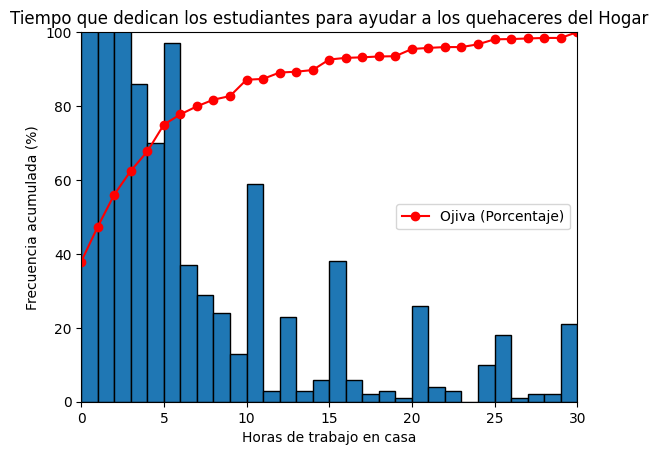

In [ ]:
# Assuming 'df' is your DataFrame
data = df['Work_At_Home_Hours']

# Calculate cumulative frequencies
sorted_data = np.sort(data)
total_data_points = len(data)
cumulative_freq = np.cumsum(np.histogram(sorted_data, bins=31, range=(0, 31))[0])
cumulative_freq_percentage = (cumulative_freq / total_data_points) * 100

# Create a histogram (optional for visualization)
plt.hist(data, bins=30, range=(0, 30), edgecolor='black')

# Plot the ogive with percentages
plt.plot(np.arange(0, 31), cumulative_freq_percentage, color='red', marker='o', linestyle='-', label='Ojiva (Porcentaje)')

# Set labels and title with adjusted y-axis limits
plt.xlabel('Horas de trabajo en casa')
plt.ylabel('Frecuencia acumulada (%)')
plt.title('Tiempo que dedican los estudiantes para ayudar a los quehaceres del Hogar')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.xlim(0, 30)  # Set x-axis limits from 0 to 30
plt.legend()

plt.show()

Esta ojiva es más detallada por su cuadrícula.

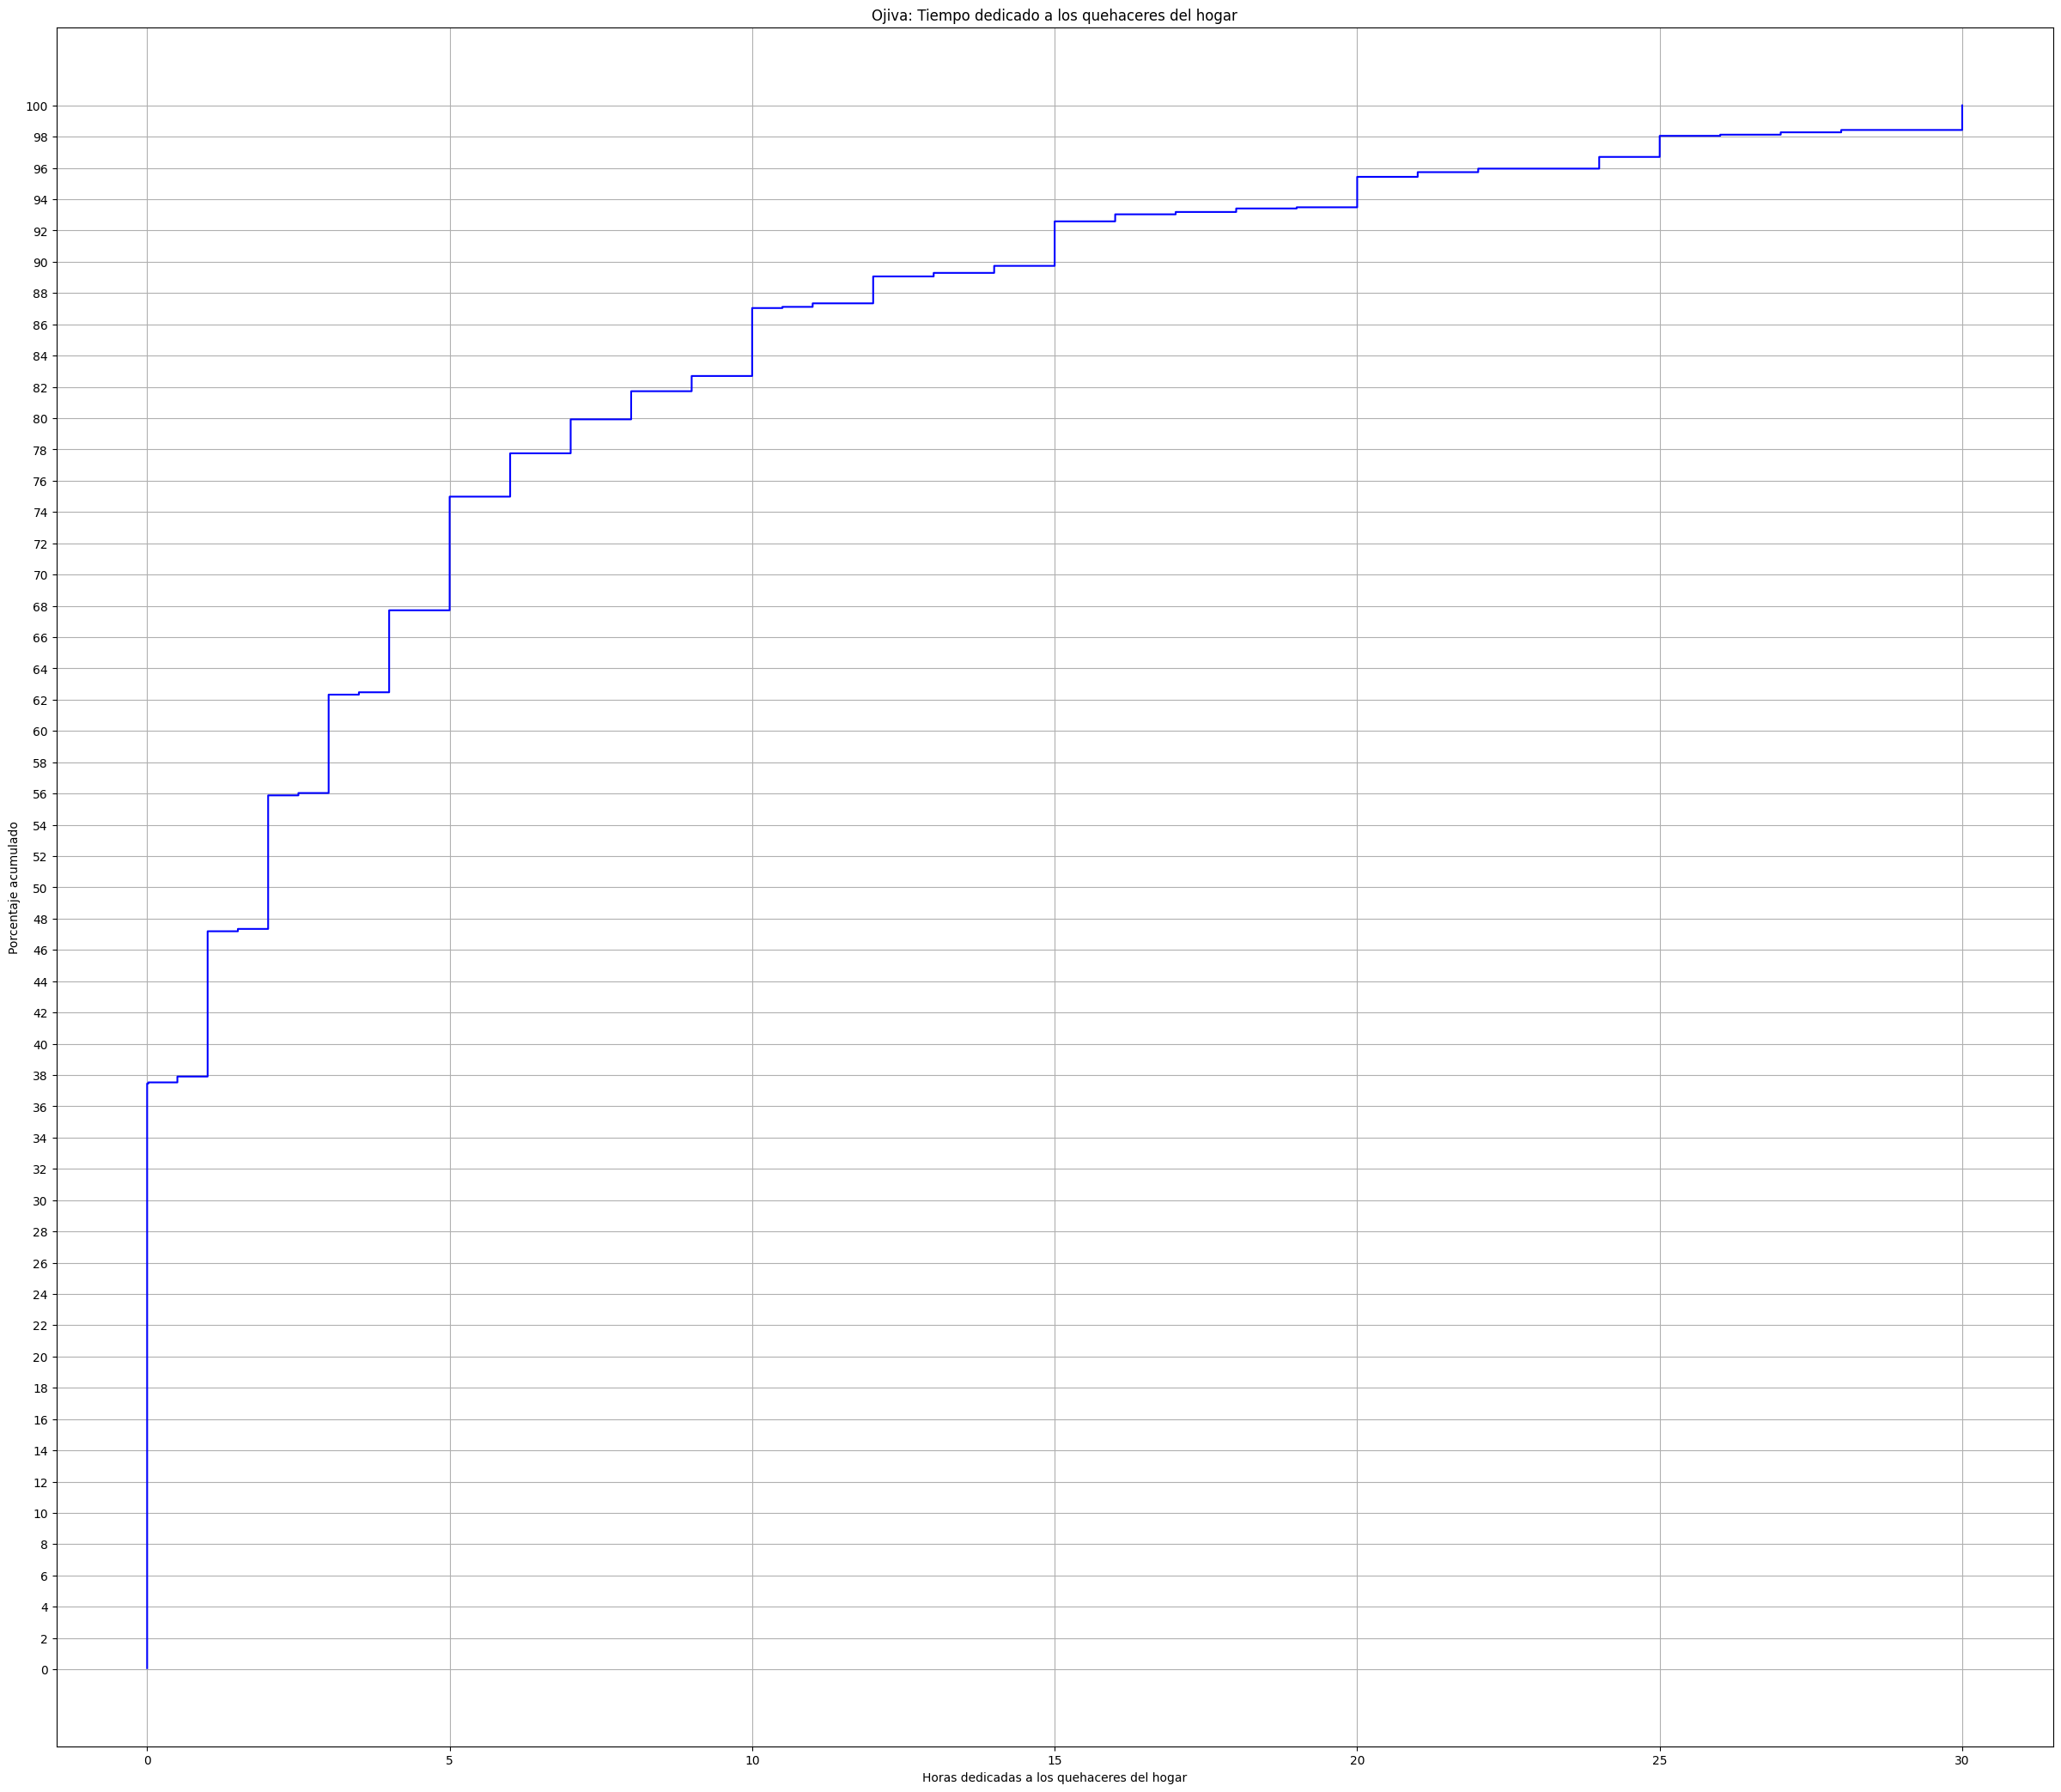

In [ ]:
# Ordenar los datos para crear la distribución acumulativa
df_sorted = df['Work_At_Home_Hours'].dropna().sort_values()
n = len(df_sorted)

# Calcular los porcentajes acumulados
percentiles = np.arange(1, n + 1) / n * 100

# Graficar la Ojiva
plt.figure(figsize=(30, 26))
plt.plot(df_sorted, percentiles, drawstyle='steps-post', color='blue')
plt.title('Ojiva: Tiempo dedicado a los quehaceres del hogar')
plt.xlabel('Horas dedicadas a los quehaceres del hogar')
plt.ylabel('Porcentaje acumulado')
plt.grid(True)
plt.yticks(range(0, 102, 2))
plt.show()


a) ¿Qué porcentaje de los estudiantes de la muestra dedican mínimo 15 horas a la semana para ayudar en sus casas?

Aproximadamente el 10% (resta de y=100 y y=90) de los estudiantes dedican mínimo 15 horas a la semana para ayudar en sus casas.

In [ ]:
# Comprobación del porcentaje exacto.

x = df['Work_At_Home_Hours']

num_students_5_hours_or_less = np.sum(x >= 15 )

total_students = len(x)

percentage = (num_students_5_hours_or_less / total_students) * 100

# Imprimir el resultado
print(f"El {percentage:.2f}% de los estudiantes ayudan en su casa al menos 15 horas a la semana.")

El 10.26% de los estudiantes ayudan en su casa al menos 15 horas a la semana.


b) ¿Qué porcentaje de los estudiantes de la muestra dedican máximo 5 horas
a la semana para ayudar en sus casas?


Aproximadamente el 75% (valor de y cuando x=5 en la ojiva) de los estudiantes dedican máximo 5 horas a la semana para ayudar en sus casas.

In [ ]:
# Comprobación del porcentaje exacto.

x = df['Work_At_Home_Hours']

num_students_5_hours_or_less = np.sum(x <= 5)

total_students = len(x)

percentage = (num_students_5_hours_or_less / total_students) * 100

print(f"El {percentage:.2f}% de los estudiantes ayudan en su casa al menos 5 horas a la semana.")

El 74.98% de los estudiantes ayudan en su casa al menos 5 horas a la semana.


c) ¿Cuál es el máximo número de horas que el 15 % de los estudiantes ayudan en sus casas?

Aproximadamente el 15% de los estudiantes dedican máximo 0 horas a la semana para ayudar en sus casas (valor de x cuando y=15 en la ojiva).

In [ ]:
#Comprobación con el percentil 15
percentile_15_max = df['Work_At_Home_Hours'].quantile(0.15)
print(f'El 15% de los estudiantes ayudan en sus casas maximo {percentile_15_max:.2f} horas a la semana.')

El 15% de los estudiantes ayudan en sus casas maximo 0.00 horas a la semana.


d) ¿Qué porcentaje de los estudiantes ayudan en sus casas al menos 5 horas
a la semana?

Aproximadamente el 32% (resta de y=100 y y=68) de los estudiantes dedican mínimo 15 horas a la semana para ayudar en sus casas.

In [ ]:
# Comprobación del porcentaje exacto.

x = df['Work_At_Home_Hours']


num_students_5_hours_or_less = np.sum(x >= 5)

total_students = len(x)


percentage = (num_students_5_hours_or_less / total_students) * 100

print(f"El {percentage:.2f}% de los estudiantes ayudan en su casa al menos 5 horas a la semana.")

El 32.28% de los estudiantes ayudan en su casa al menos 5 horas a la semana.


e) ¿Cuál es el mínimo número de horas que el 35 % de los estudiantes ayudan
en sus casas?

In [ ]:
#Comprobación con el percentil 35
percentile_35_max = df['Work_At_Home_Hours'].quantile(0.35)
print(f'El 35% de los estudiantes  ayudan en su casa como minimo {percentile_35_max:.2f} horas a la semana.')

El 35% de los estudiantes  ayudan en su casa como minimo 0.00 horas a la semana.


f ) ¿En cuál intervalo se halla la moda?

In [ ]:
mode_paid_hours = df['Paid_Work_Hours'].mode()[0]
print(f'La moda de las horas que los estudiantes ayudan en su casa es: {mode_paid_hours} horas.')

La moda de las horas que los estudiantes ayudan en su casa es: 0.0 horas.


g) ¿En promedio cuántas horas ayudan en sus casas en la semana los estudiantes? ¿Cuál es la desviación estándar?

In [ ]:
mean_home_hours = df['Work_At_Home_Hours'].mean()
std_home_hours = df['Work_At_Home_Hours'].std()

print(f'En promedio, los estudiantes ayudan en casa {mean_home_hours:.2f} horas a la semana.')
print(f'La desviación estándar de las horas dedicadas al hogar es {std_home_hours:.2f}.')


En promedio, los estudiantes ayudan en casa 4.53 horas a la semana.
La desviación estándar de las horas dedicadas al hogar es 6.67.


h) ¿Qué tipo de asimetría presenta esta variable?

Según la gráfica esta variable tiene sesgo a la derecha y los datos están acumulados a la izquierda en la gráfica, lo cual indica que tiene una asimetría positiva. Esto se puede verificar con el valor de la Skewness, que este caso es de 2.04, y dado que es un valor mayor que cero, nos indica que la asimetría es positiva.

In [ ]:
skewness_home_hours = df['Work_At_Home_Hours'].skew()
print(f'La Skewness de las horas de trabajo en casa es {skewness_home_hours:.2f}')

La Skewness de las horas de trabajo en casa es 2.04


## 8. Construya una gráfica de Diagrama de cajas para la comparar la opinión en los diferentes Estados de hombres y mujeres (Gender) con respecto a la importancia de reducir la contaminaciónn (pollution) a partir de esta gráfica responda las siguientes preguntas:

Código en R

```
# ggplot(df %>% filter(!is.na(Gender)), aes(x = Gender, y = Importance_reducing_pollution, fill = Gender)) +
  geom_boxplot()+
  geom_point(aes(y = max(Importance_reducing_pollution)), color = "blue", position = position_dodge(width = 0.75), show.legend = FALSE) +
  geom_point(aes(y = min(Importance_reducing_pollution)), color = "green", position = position_dodge(width = 0.75), show.legend = FALSE) +
  facet_wrap(~Region)+
  stat_summary(aes(group = Gender), fun = mean, geom = "point", shape = 20, size = 3, color = "red")+
  labs(title = "Boxplot of Importance of Reducing Pollution by Region")+
  scale_y_continuous(limits = c(0, 1050))
```

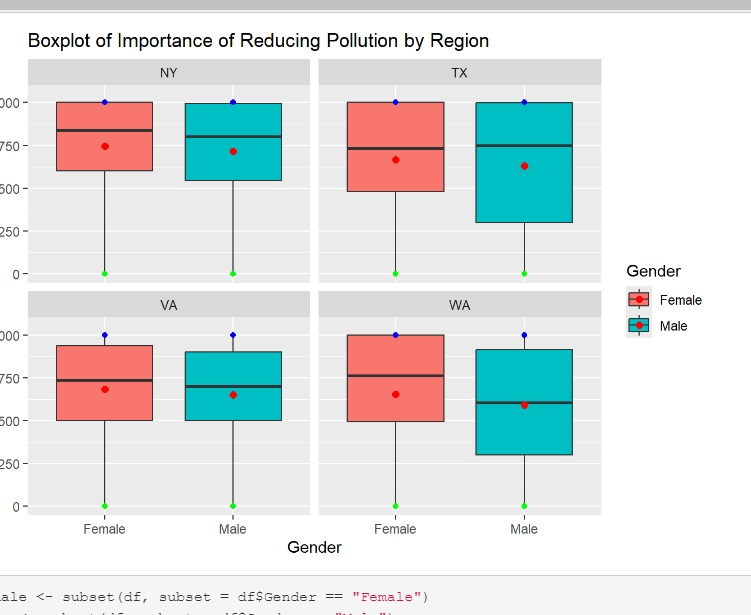

Diagramas de cajas y bigotes en una sola gráfica con Seaborn.

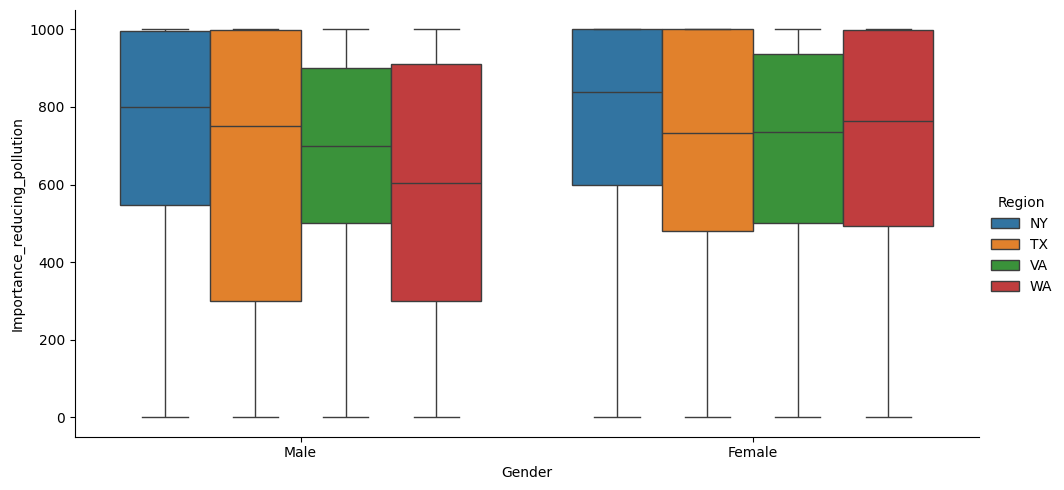

In [ ]:
sns.catplot(x="Gender", y="Importance_reducing_pollution", data = df, kind = "box", hue = "Region", aspect = 2);

a) ¿En términos generales para quienes (hombres o mujeres) es más importante reducir la contaminación?

En términos generales para las mujeres es más importante reducir la contaminación. Esto dado que la media de las mujeres en la mayoria de los casos está por encima de los hombres según la gráfica de Seaborn.

In [ ]:
# verificación del valor exacto de la media por género.

df.groupby(['Gender'])['Importance_reducing_pollution'].median()


,Importance_reducing_pollution
Gender,
Female,794.0
Male,700.0


 b) ¿En términos generales en cuál Estado es más importante reducir la contaminación?

En términos generales en New York es más importante reducir la contaminación. Esto dado que la media de tanto para mujeres como para hombres en la mayoria de los casos esta por encima de la media de los demás estados en la gráfica de seaborn.

In [ ]:
# verificación del valor exacto de la media por género.
df.groupby(['Region'])['Importance_reducing_pollution'].median()

,Importance_reducing_pollution
Region,
NY,800.0
TX,750.0
VA,701.0
WA,674.0


c) ¿En términos generales en cuál Estado es más importante para las mujeres reducir la contaminación?

En términos generales en New York es más importante para las mujeres reducir la contaminación. Esto dado que la media de las mujeres en la gráfica para este estado está por encima de la media de las mujeres en los demás estados.

In [ ]:
df.groupby(['Region', 'Gender'])['Importance_reducing_pollution'].median()

Region  Gender
NY      Female    837.5
        Male      800.0
TX      Female    733.0
        Male      750.0
VA      Female    735.5
        Male      700.0
WA      Female    763.5
        Male      604.0
Name: Importance_reducing_pollution, dtype: float64

d) ¿En términos generales en cuál Estado es más importante para los hombres
reducir la contaminación?


En términos generales en New York es más importante para los hombres reducir la contaminación. Esto dado que la media de las hombres en la gráfica para este estado está por encima de la media de las hombres en los demás estados.

e) ¿En términos generales en qué género la importancia de reducir la contaminaciónn es más homogénea?


En términos generales para las mujeres la importancia de reducir la contaminación es más homogénea. Esto dado que la media de las mujeres para la mayoría de estados en la gráfica es más similar que la media entre los hombres, al igual que la longitud de sus bigotes e IQR en la gráfica.

f ) ¿En términos generales en cuál Estado la importancia de reducir la contaminación es más heterogénea?


En términos generales en Washington la importancia de reducir la contaminaciónes más heterogénea. Esto dado que la media de las mujeres y los hombres presentan mayor diferencia en comparación con los demás estados; y por la diferencia en la longitud de los bigotes e IQR en ambos casos.

g) ¿En cuál género se presenta mayor asimetría en las calificaciones de la
importancia de reducir la contaminación?

En el género femenino se presenta mayor asimetría en las calificaciones de la importancia de reducir la contaminación. Pues por una parte su valor de skewness se encuentra más lejos de 0, pero también en la gráfica de Seaborn se evidencia mayor discrepancia en el largo de los bigotes para cada estado.

In [ ]:
from scipy.stats import skew


pollution = df.groupby('Gender')['Importance_reducing_pollution']

# Calcular asimetría para cada grupo
skewness = pollution.apply(lambda x: skew(x))

# Mostrar resultados con explicación
for gender, skew_value in skewness.items():
    if skew_value > 0:
        description = 'La distribución tiene una cola hacia la derecha (asimetría positiva).'
    elif skew_value < 0:
        description = 'La distribución tiene una cola hacia la izquierda (asimetría negativa).'
    else:
        description = 'La distribución es aproximadamente simétrica.'

    print(f'Género: {gender}')
    print(f'Asimetría: {skew_value:.2f}')
    print(f'Interpretación: {description}\n')

Género: Female
Asimetría: -0.88
Interpretación: La distribución tiene una cola hacia la izquierda (asimetría negativa).

Género: Male
Asimetría: -0.63
Interpretación: La distribución tiene una cola hacia la izquierda (asimetría negativa).



h) ¿En cuál Estado se presenta mayor asimetría en las calificaciones de la
importancia de reducir la contaminación?


New York, pues en el cáculo de su skewness presenta un valor más lejano a 0 (-1.13).

En la gráfica de Nueva York los bigotes inferiores son más largos que los superiores y la mediana se encuentra más cerca del borde superior de la caja para los dos géneros.

In [ ]:
from scipy.stats import skew

# Agrupar por género y calcular asimetría de las horas de sueño
pollution = df.groupby('Region')['Importance_reducing_pollution']

# Calcular asimetría para cada grupo
skewness = pollution.apply(lambda x: skew(x))

# Mostrar resultados con explicación
for region, skew_value in skewness.items():
    if skew_value > 0:
        description = 'La distribución tiene una cola hacia la derecha (asimetría positiva).'
    elif skew_value < 0:
        description = 'La distribución tiene una cola hacia la izquierda (asimetría negativa).'
    else:
        description = 'La distribución es aproximadamente simétrica.'

    print(f'Estado: {region}')
    print(f'Asimetría: {skew_value:.2f}')
    print(f'Interpretación: {description}\n')

Estado: NY
Asimetría: -1.13
Interpretación: La distribución tiene una cola hacia la izquierda (asimetría negativa).

Estado: TX
Asimetría: -0.62
Interpretación: La distribución tiene una cola hacia la izquierda (asimetría negativa).

Estado: VA
Asimetría: -0.76
Interpretación: La distribución tiene una cola hacia la izquierda (asimetría negativa).

Estado: WA
Asimetría: -0.50
Interpretación: La distribución tiene una cola hacia la izquierda (asimetría negativa).



i) ¿En cuál Estado las mujeres presentan mayor simetría en las calificaciones
de la importancia de reducir la contaminación?


Texas, pues en el cáculo de su skewness presenta un valor más cercano a 0 (-0.68).

En la gráfica de Texas para las mujeres los bigotes inferiores son más largos que los superiores, pero la mediana se encuentra más cerca del centro de la caja.

In [ ]:

pollution = df[df['Gender'] == 'Female'].groupby('Region')['Importance_reducing_pollution']

# Calcular asimetría para cada grupo
skewness = pollution.apply(lambda x: skew(x))

# Encontrar el estado con menor asimetría (más cercano a cero)
most_symmetric_state = skewness.abs().idxmin()
min_skewness = skewness.abs().min()

print(f'El estado con mayor simetría en las calificaciones de importancia de reducir la contaminación para las mujeres es: {most_symmetric_state} (Asimetría: {min_skewness:.2f})')
print(skewness)

El estado con mayor simetría en las calificaciones de importancia de reducir la contaminación para las mujeres es: TX (Asimetría: 0.68)
Region
NY   -1.224998
TX   -0.684277
VA   -0.900807
WA   -0.722207
Name: Importance_reducing_pollution, dtype: float64


## 9. Construya una tabla cruzada de indicadores entre la variable “¿Cuántas horas de sueño por noche suele dormir cuando no tiene clases al día siguiente?” versus “Género”. A partir de esta tabla responda las siguientes preguntas:

In [ ]:
from tabulate import tabulate
# Crear tabla cruzada (crosstab)
sleep_vs_gender = pd.crosstab(df['Sleep_Hours_Non_Schoolnight'], df['Gender'])

# Añadir columna de Totales
sleep_vs_gender['Total'] = sleep_vs_gender.sum(axis=1)

# Añadir fila de Totales
sleep_vs_gender.loc['Total'] = sleep_vs_gender.sum(axis=0)

# Mostrar tabla con formato "fancy_grid"
print(tabulate(sleep_vs_gender, headers='keys', tablefmt='fancy_grid'))

╒═══════════════════════════════╤══════════╤════════╤═════════╕
│ Sleep_Hours_Non_Schoolnight   │   Female │   Male │   Total │
╞═══════════════════════════════╪══════════╪════════╪═════════╡
│ 4.0                           │       14 │     12 │      26 │
├───────────────────────────────┼──────────┼────────┼─────────┤
│ 5.0                           │       33 │     37 │      70 │
├───────────────────────────────┼──────────┼────────┼─────────┤
│ 5.5                           │        1 │      1 │       2 │
├───────────────────────────────┼──────────┼────────┼─────────┤
│ 6.0                           │       28 │     51 │      79 │
├───────────────────────────────┼──────────┼────────┼─────────┤
│ 6.5                           │        3 │      2 │       5 │
├───────────────────────────────┼──────────┼────────┼─────────┤
│ 7.0                           │       52 │     40 │      92 │
├───────────────────────────────┼──────────┼────────┼─────────┤
│ 7.4                           │       

a) ¿Qué porcentaje de estudiantes de la muestra son mujeres?

(670/1335) * 100 = 50.187

El 50.19% de estudiantes de la muestra son mujeres.

In [ ]:
# Comprobación
# Calcular el número de mujeres
num_mujeres = df['Gender'].value_counts()['Female']

# Calcular el tamaño total de la muestra
total_estudiantes = len(df)

# Calcular el porcentaje de mujeres
porcentaje_mujeres = (num_mujeres / total_estudiantes) * 100

# Imprimir el resultado
print(f"El porcentaje de estudiantes mujeres en la muestra es: {porcentaje_mujeres:.2f}%")

El porcentaje de estudiantes mujeres en la muestra es: 50.19%


b) ¿Cuántas horas de sueño en promedio suelen dormir cuando no tiene clases
al día siguiente los estudiantes de la muestra?


En promedio cuando estudiantes de la muestra no tienen clases al día siguiente suelen dormir 8.77 horas (se multiplica cada valor por su frecuencia y se suman, luego se divide este valor entre 1335).

In [ ]:
# Comprobación
promedio_horas_sueno = df['Sleep_Hours_Non_Schoolnight'].mean()

print(f"En promedio, los estudiantes de la muestra duermen {promedio_horas_sueno:.2f} horas cuando no tienen clases al día siguiente.")

En promedio, los estudiantes de la muestra duermen 8.78 horas cuando no tienen clases al día siguiente.


c) ¿En términos generales qué género duermen más tiempo?


In [ ]:
# Calcular el promedio de horas de sueño por género
promedio_horas_sueno_genero = df.groupby('Gender')['Sleep_Hours_Non_Schoolnight'].mean()

# Imprimir los resultados
print(promedio_horas_sueno_genero)

# Comparar los promedios
if promedio_horas_sueno_genero['Female'] > promedio_horas_sueno_genero['Male']:
  print("En términos generales, las mujeres duermen más tiempo.")
elif promedio_horas_sueno_genero['Male'] > promedio_horas_sueno_genero['Female']:
  print("En términos generales, los hombres duermen más tiempo.")
else:
  print("En términos generales, ambos géneros duermen la misma cantidad de tiempo.")


Gender
Female    8.820149
Male      8.742707
Name: Sleep_Hours_Non_Schoolnight, dtype: float64
En términos generales, las mujeres duermen más tiempo.


d) ¿En términos generales qué género los tiempos son más homogéneos?


In [ ]:
# Calcular la desviación estándar de las horas de sueño por género
std_horas_sueno_genero = df.groupby('Gender')['Sleep_Hours_Non_Schoolnight'].std()

# Imprimir los resultados
print(std_horas_sueno_genero)

# Comparar las desviaciones estándar
if std_horas_sueno_genero['Female'] < std_horas_sueno_genero['Male']:
  print("En términos generales, los tiempos de sueño son más homogéneos en las mujeres.")
elif std_horas_sueno_genero['Male'] < std_horas_sueno_genero['Female']:
  print("En términos generales, los tiempos de sueño son más homogéneos en los hombres.")
else:
  print("En términos generales, los tiempos de sueño son igualmente homogéneos en ambos géneros.")


Gender
Female    1.923452
Male      1.950358
Name: Sleep_Hours_Non_Schoolnight, dtype: float64
En términos generales, los tiempos de sueño son más homogéneos en las mujeres.


e) ¿En términos generales qué género los tiempos son más simétricos?


Las mujeres tiene tiempos más simétricos de acuerdo al valor de la skewness para esta variable y género, que es menor que el de los hombres.

In [ ]:
from scipy.stats import skew

# Agrupar por género y calcular asimetría de las horas de sueño
sleep_by_gender = df.groupby('Gender')['Sleep_Hours_Non_Schoolnight']

# Calcular asimetría para cada grupo
skewness = sleep_by_gender.apply(lambda x: skew(x))

# Mostrar resultados con explicación
for gender, skew_value in skewness.items():
    if skew_value > 0:
        description = 'La distribución tiene una cola hacia la derecha (asimetría positiva).'
    elif skew_value < 0:
        description = 'La distribución tiene una cola hacia la izquierda (asimetría negativa).'
    else:
        description = 'La distribución es aproximadamente simétrica.'

    print(f'Género: {gender}')
    print(f'Asimetría: {skew_value:.2f}')
    print(f'Interpretación: {description}\n')

Género: Female
Asimetría: -0.19
Interpretación: La distribución tiene una cola hacia la izquierda (asimetría negativa).

Género: Male
Asimetría: -0.23
Interpretación: La distribución tiene una cola hacia la izquierda (asimetría negativa).



f ) ¿Cuál género tiene un histograma más puntiagudo? ¿Cuál género tiene un
histograma más aplanado o chato?

Las mujeres tienen un histograma más puntiagudo, de acuerdo al valor de la kurtosis para esta variable y género.

Como la kurtosis para el histograma de los hombres presenta un valor inferior al de las mujeres, este tiene un histograma más aplanado.

In [ ]:
kurtosis_genero = df.groupby('Gender')['Sleep_Hours_Non_Schoolnight'].apply(lambda x: x.kurtosis())

# Imprimir los resultados
print(kurtosis_genero)

Gender
Female    0.358756
Male      0.103952
Name: Sleep_Hours_Non_Schoolnight, dtype: float64


## 10. Construya una tabla cruzada entre la variable “Materia preferida en el Colegio” versus la variable “Género”. A partir de esta tabla responda las siguientes preguntas:

In [ ]:
from tabulate import tabulate
# Crear tabla cruzada (crosstab)
subject_vs_gender = pd.crosstab(df['Favorite_School_Subject'], df['Gender'])

# Añadir columna de Totales
subject_vs_gender['Total'] = subject_vs_gender.sum(axis=1)

# Añadir fila de Totales
subject_vs_gender.loc['Total'] = subject_vs_gender.sum(axis=0)

# Mostrar tabla con formato "fancy_grid"
print(tabulate(subject_vs_gender, headers='keys', tablefmt='fancy_grid'))

╒════════════════════════════╤══════════╤════════╤═════════╕
│ Favorite_School_Subject    │   Female │   Male │   Total │
╞════════════════════════════╪══════════╪════════╪═════════╡
│ Art                        │      100 │     40 │     140 │
├────────────────────────────┼──────────┼────────┼─────────┤
│ Computers and technology   │        8 │     48 │      56 │
├────────────────────────────┼──────────┼────────┼─────────┤
│ English                    │       99 │     18 │     117 │
├────────────────────────────┼──────────┼────────┼─────────┤
│ Geography                  │        2 │      6 │       8 │
├────────────────────────────┼──────────┼────────┼─────────┤
│ History                    │       77 │    134 │     211 │
├────────────────────────────┼──────────┼────────┼─────────┤
│ Languages                  │       19 │      2 │      21 │
├────────────────────────────┼──────────┼────────┼─────────┤
│ Mathematics and statistics │       91 │    107 │     198 │
├───────────────────────

a) ¿A cuántos estudiantes hombres les gusta la historia?

A 134 estudiantes hombres les gusta la historia.

b) ¿Qué porcentaje de estudiantes son hombres?

(665/1135) * 100 = 49.81

El 49.81% de los estudiantes son hombres.

c) ¿Qué porcentaje de estudiantes prefieren música?

(82/1135) * 100 = 6.14

El 6.14% de los estudiantes prefieren música.

d) ¿De las mujeres, qué porcentaje de estudiantes prefieren otras actividades?

(55/670) * 100 = 8.20

El 8.2% de las estudiantes prefieren otras actividades.

e) ¿De los estudiantes que prefieren Ciencias, qué porcentaje son hombres?

(70/166) * 100 = 42.16

El 42.16% de los estudiantes que prefieren Ciencias son hombres.

f ) ¿Qué porcentaje son mujeres y prefieren otras actividades?

(55/1335) * 100 = 4.11

E 4.11% de los estudiantes son mujeres que prefieren otras actividades.

g) ¿Qué porcentaje son mujeres o prefieren música?

(670 + 35 /1335) = 52.8

El 52.8% de los estudiantes son mujeres o prefieren música.

h) ¿De las mujeres, qué porcentaje le gusta la música o las Ciencias?

(96 + 47 /670) = 21.34

El 21.34% de las estudiantes mujeres prefieren la música o las ciencias.